# Script description
This is a script used in the publication: Walther R, Lancaster C, Burden J, Pichaud F 'A Dystroglycan-Laminin-Integrin axis controls cell basal geometry remodeling in the developing Drosophila retina'

This script takes the original cell shape descriptors from Cell Pose segmentation and Napari based regionprops analysis. It then perfoms PCA for each secondary and tertiary cell type comparing between pairs of genotypes e.g. comparing secondary pigment cells for Dystroglycan RNAi and Dystrophin RNAi.

In [18]:
#Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from scipy import stats
import scipy as sp
import glob

In [19]:
#read datafiles
#Set file directory
os.chdir('/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/Revision/databases_final')
print(os.getcwd())

/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/Revision/databases_final


In [20]:
#list all csv files
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Dg_ID3_measurements_scaled.csv',
 'data_check.csv',
 'ID3_LanB1_sg_measurements_scaled.csv',
 'ID2_Dg_GFP_GFPIR_measurements_scaled.csv',
 'ID12_wt_measurements_scaled.csv',
 'ID8_Dys_measurements_scaled.csv',
 'ID7_Dys_measurements_scaled.csv',
 'ID2_GFP_RNAi_DysGFP_measurements_scaled.csv',
 'ID3_GFP_RNAi_Dys_Mimic_measurements_scaled.csv',
 'ID2_LanB1_sg_measurements_scaled.csv',
 'ID1_Dys_measurements_scaled.csv',
 'Dg_ID2_measurements_scaled.csv',
 'ID1_GFP_RNAi_DysGFP_measurements_scaled.csv',
 'ID9_wt_measurements_scaled.csv',
 'Dg_ID1_measurements_scaled.csv',
 'ID1_Dg_GFP_GFPIR_measurements_scaled.csv',
 'ID1_LanB1_sg_measurements_scaled.csv',
 'ID3_DgGFP_GFPIR_measurements_scaled.csv',
 'ID10_wt_measurements_scaled.csv']

In [21]:
df_append = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file)
            df_append = df_append.append(df_temp, ignore_index=True)
            
            

/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_41418/126826932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_41418/126826932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_41418/126826932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_41418/126826932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

In [22]:
#Drop unwanted columns from dataframe and save it as a new dataframe
drop_columns = ['area_pixels','label','bbox_area','convex_area','equivalent_diameter','max_intensity',
               'mean_intensity', 'min_intensity','perimeter_pixels','perimeter_crofton','local_centroid-0',
               'local_centroid-1','standard_deviation_intensity','index']


df_reduced=df_append.drop(columns=drop_columns)

df_reduced

df_reduced=df_reduced.iloc[: , :-3]


df_reduced

,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,perimeter,area,cell_shape_index,cell_type,id,Unnamed: 0.1
0,0,0.572937,0.892581,91.137259,81.109958,45.273228,-0.215583,0.829726,1.791566,0.514612,0.496342,0,18.310878,13.243090,5.031697,bristle,Dg_IR,NaN
1,1,0.560650,0.886430,145.578158,131.225294,72.207942,0.888210,0.834994,1.817325,0.515357,0.507001,0,29.332726,34.713930,4.978523,secondary,Dg_IR,NaN
2,2,0.572533,0.856944,63.324561,59.526565,44.383640,1.225844,0.666382,1.341183,0.665112,0.527741,0,14.816070,9.218864,4.879713,bristle,Dg_IR,NaN
3,3,0.658951,0.896588,85.070559,80.251412,57.455235,1.465259,0.698161,1.396764,0.675340,0.590601,0,19.026203,17.013312,4.612726,bristle,Dg_IR,NaN
4,4,0.579556,0.859800,69.971423,66.284542,37.426430,1.062370,0.825342,1.771062,0.522494,0.528192,0,14.616461,8.979801,4.877630,NaN,Dg_IR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12139,261,0.702621,0.862563,107.935166,101.729503,76.885278,-1.569145,0.654824,1.323134,0.718873,0.578835,0,25.135132,29.100932,4.659376,NaN,wild_type,NaN
12140,262,0.811577,0.905782,190.517716,203.694145,66.651033,-1.553588,0.944951,3.056129,0.315369,0.493136,0,36.115210,51.184370,5.048025,secondary,wild_type,NaN
12141,263,0.722795,0.891782,53.366656,52.276890,38.472184,-1.491580,0.677057,1.358823,0.717948,0.655018,0,12.134315,7.674916,4.380044,NaN,wild_type,NaN
12142,264,0.500000,0.769231,5.830952,6.774468,2.338072,-0.626400,0.938555,2.897460,0.277434,1.256637,0,0.705725,0.049805,3.162278,NaN,wild_type,NaN


In [23]:
df_dropped=df_reduced.dropna()
df_dropped

,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,perimeter,area,cell_shape_index,cell_type,id,Unnamed: 0.1
330,0,0.572937,0.892581,91.137259,81.109958,45.273228,-0.215583,0.829726,1.791566,0.514612,0.496342,0,18.310878,13.243090,5.031697,bristle,Dg_IR,0.0
331,1,0.560650,0.886430,145.578158,131.225294,72.207942,0.888210,0.834994,1.817325,0.515357,0.507001,0,29.332726,34.713930,4.978523,secondary,Dg_IR,1.0
332,2,0.572533,0.856944,63.324561,59.526565,44.383640,1.225844,0.666382,1.341183,0.665112,0.527741,0,14.816070,9.218864,4.879713,bristle,Dg_IR,2.0
333,3,0.658951,0.896588,85.070559,80.251412,57.455235,1.465259,0.698161,1.396764,0.675340,0.590601,0,19.026203,17.013312,4.612726,bristle,Dg_IR,3.0
335,5,0.712932,0.929168,106.733313,107.097406,64.066773,1.443333,0.801339,1.671653,0.567914,0.590925,0,23.277677,25.480124,4.611465,tertiary,Dg_IR,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,254,0.777474,0.957025,66.068147,62.481235,53.477800,-0.443480,0.517138,1.168358,0.835258,0.715297,0,14.969323,12.755004,4.191427,bristle,wild_type,6060.0
6391,255,0.694178,0.787303,97.169954,98.387779,52.104999,-1.487987,0.848255,1.888260,0.446942,0.489332,0,20.847333,16.923663,5.067611,bristle,wild_type,6061.0
6392,256,0.681460,0.809482,174.413302,187.303573,49.658163,-1.558562,0.964215,3.771859,0.232381,0.421700,0,30.826931,31.889999,5.458874,secondary,wild_type,6062.0
6394,258,0.769382,0.880698,198.176689,211.133780,64.159441,-1.563230,0.952710,3.290767,0.291394,0.505648,0,35.535227,50.810834,4.985181,secondary,wild_type,6064.0


In [24]:
#Need to split dataframe for cell types 

secondary=df_dropped[df_dropped["cell_type"]=='secondary']

tertiary=df_dropped[df_dropped["cell_type"]=='tertiary']

secondary

,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,perimeter,area,cell_shape_index,cell_type,id,Unnamed: 0.1
331,1,0.560650,0.886430,145.578158,131.225294,72.207942,0.888210,0.834994,1.817325,0.515357,0.507001,0,29.332726,34.713930,4.978523,secondary,Dg_IR,1.0
336,6,0.637718,0.927345,86.977008,81.176583,56.316185,0.212508,0.720217,1.441443,0.678197,0.583621,0,19.401205,17.481477,4.640231,secondary,Dg_IR,6.0
342,12,0.578059,0.896890,135.074054,123.638417,79.426496,-0.484162,0.766362,1.556639,0.624523,0.541531,0,29.437546,37.343622,4.817186,secondary,Dg_IR,12.0
348,18,0.528555,0.811270,140.117808,128.735979,61.370871,-0.387780,0.879056,2.097672,0.418089,0.407735,0,28.902199,27.103760,5.551574,secondary,Dg_IR,18.0
350,20,0.677213,0.947583,128.968989,118.326671,76.908019,0.664630,0.759965,1.538548,0.634565,0.608640,0,26.787101,34.753774,4.543858,secondary,Dg_IR,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,246,0.516094,0.800091,234.232790,222.808910,68.530831,-1.400477,0.951523,3.251221,0.271402,0.375831,0,41.978603,52.703416,5.782406,secondary,wild_type,6052.0
6388,252,0.636865,0.857457,216.363121,211.998618,59.463873,-1.459959,0.959856,3.565167,0.265167,0.370854,0,39.744500,46.617272,5.821081,secondary,wild_type,6058.0
6392,256,0.681460,0.809482,174.413302,187.303573,49.658163,-1.558562,0.964215,3.771859,0.232381,0.421700,0,30.826931,31.889999,5.458874,secondary,wild_type,6062.0
6394,258,0.769382,0.880698,198.176689,211.133780,64.159441,-1.563230,0.952710,3.290767,0.291394,0.505648,0,35.535227,50.810834,4.985181,secondary,wild_type,6064.0


In [46]:
#Subset dataframe for each cell type into genotypes
#Set 1: Mys, Talin
#Set 2: Dg, Sarc

values1=['Dys_IR','GFP_IR_DysGFP']

values2=['Dys_IR','Dg_IR']

values3= ['Dg_IR','GFP_IR_DgGFP']

values4= ['GFP_IR_DysGFP','GFP_IR_DgGFP']


secondary_Dg_dgGFP= secondary[secondary['id'].isin(values3)]

secondary_Dys= secondary[secondary['id'].isin(values1)]

secondary_Dg_Dys= secondary[secondary['id'].isin(values2)]

secondary_GFPs= secondary[secondary['id'].isin(values4)]


tertiary_Dys= tertiary[tertiary['id'].isin(values1)]

tertiary_Dg_Dys= tertiary[tertiary['id'].isin(values2)]

tertiary_Dg_dgGFP= tertiary[tertiary['id'].isin(values3)]

tertiary_GFPs= tertiary[tertiary['id'].isin(values4)]

tertiary_GFPs

,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,perimeter,area,cell_shape_index,cell_type,id,Unnamed: 0.1
908,1,0.416173,0.786164,140.003571,131.342960,71.181205,-0.493349,0.840411,1.845192,0.415163,0.489540,0,26.816837,28.015187,5.066532,tertiary,GFP_IR_DgGFP,578.0
917,10,0.582254,0.871242,113.282832,104.496350,73.282359,0.113641,0.712875,1.425941,0.608315,0.578779,0,23.751697,25.983152,4.659601,tertiary,GFP_IR_DgGFP,587.0
935,28,0.335064,0.673671,163.783393,148.329818,63.597143,0.779295,0.903421,2.332335,0.280148,0.357694,0,29.103959,24.110493,5.927192,tertiary,GFP_IR_DgGFP,605.0
936,29,0.327177,0.694342,179.449157,213.530644,52.860310,1.016355,0.968874,4.039527,0.179584,0.347951,0,34.011077,32.029452,6.009601,tertiary,GFP_IR_DgGFP,606.0
941,34,0.347391,0.586850,198.600101,146.860725,103.944920,1.048196,0.706434,1.412871,0.479470,0.332020,0,39.128192,40.451440,6.152091,tertiary,GFP_IR_DgGFP,611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,239,0.547118,0.866296,144.585615,124.974128,63.801010,-1.206429,0.859870,1.958811,0.482768,0.453565,0,28.586091,29.494389,5.263627,tertiary,GFP_IR_DgGFP,5771.0
6104,242,0.406732,0.774711,106.826963,117.536257,43.588529,-0.769432,0.928692,2.696495,0.320734,0.438512,0,22.286368,17.332063,5.353209,tertiary,GFP_IR_DgGFP,5774.0
6120,258,0.548877,0.817265,145.120639,140.386744,55.634560,1.236057,0.918123,2.523373,0.366368,0.450073,0,28.082053,28.244289,5.284009,tertiary,GFP_IR_DgGFP,5790.0
6128,266,0.677679,0.879830,92.849340,84.371958,73.288183,-0.285264,0.495458,1.151235,0.814530,0.580245,0,22.163133,22.681096,4.653708,tertiary,GFP_IR_DgGFP,5798.0


In [26]:
#Functon for PCA analysis

def PCA_(dataframe,target_select,labels,save_option, filename):
    #PCA between genotypes for secondary pigment cell - have id as target

    #PCA analysis to reduce the dimentions of the data to be ploted in 2D

    from sklearn.preprocessing import StandardScaler
    
    global features

    features=['extent','major_axis_length','minor_axis_length','eccentricity',
             'roundness','circularity','area','cell_shape_index','perimeter']

    # Separating out the features
    global x
    x = dataframe.loc[:, features].values

    # Separating out the target
    global y
    y = dataframe.loc[:,['id']].values

    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    
    dataframe= dataframe.reset_index()

    finalDf = pd.concat([principalDf, dataframe[['id']]], axis = 1)
    
    
    target=target_select

    target_labels=labels
    
    global pca_out
    
    pca_out = PCA().fit(x)
    print(pca.explained_variance_ratio_)


    fig = plt.figure(figsize = (12,11))
    ax = fig.add_subplot(1,1,1) 

    ax.tick_params(width=6)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(6)

    ax.set_xlabel('PC1', fontsize = 45, fontname="Helvetica")
    ax.set_ylabel('PC2', fontsize = 45, fontname="Helvetica")
    targets = target
    colors = ['m', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['id'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 100)
    ax.legend(target_labels, fontsize=20)

    plt.yticks(fontsize=35)
    plt.xticks(fontsize=35)

    sns.despine()

    if save_option==1:

        plt.savefig(filename + 'PCA_plots.png', dpi=500)

[0.47464767 0.34949713]


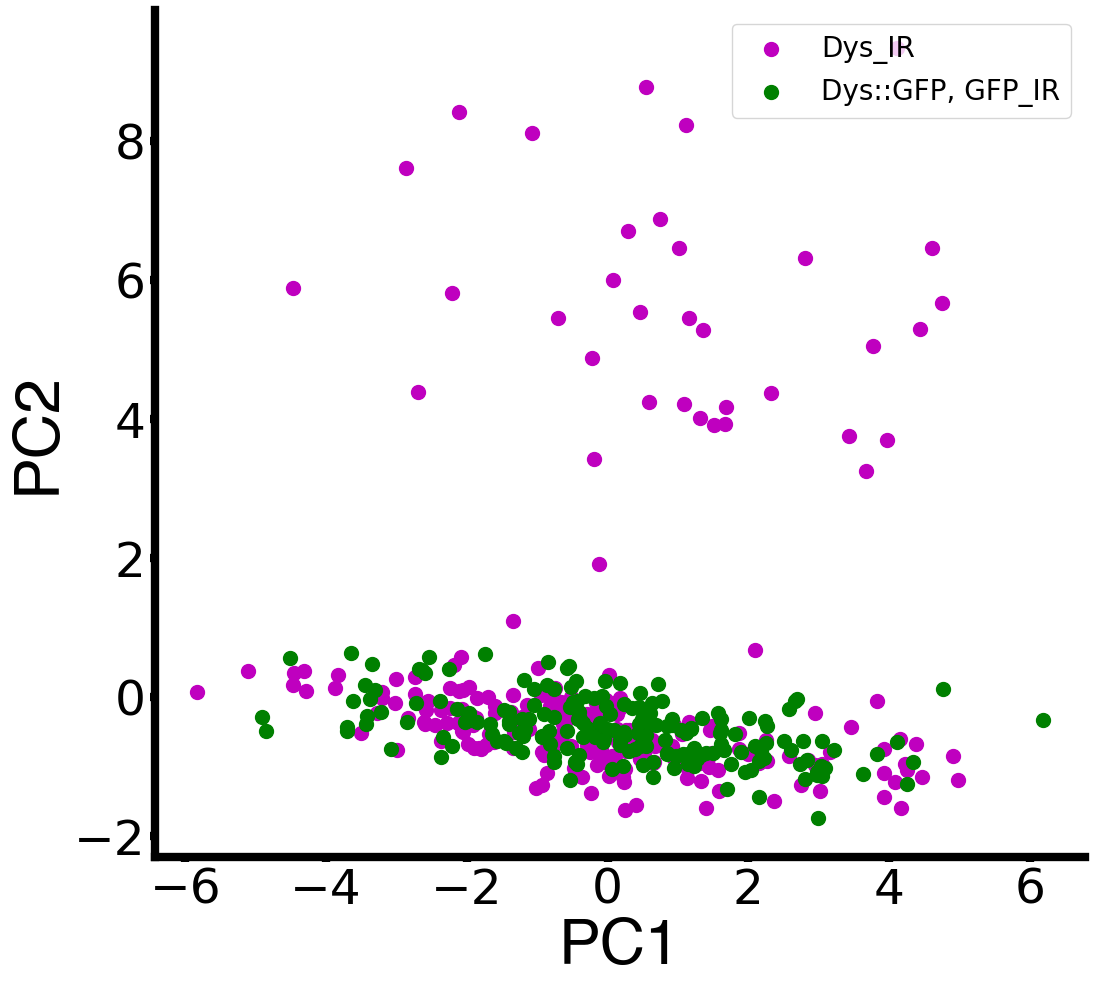

In [12]:
target_select=['Dys_IR','GFP_IR_DysGFP']
labels=['Dys_IR','Dys::GFP, GFP_IR']


PCA_(secondary_Dys, target_select, labels,0, 'PCA_compare_secondary_Cells_DysIR_DysGFP_GFP_IR')

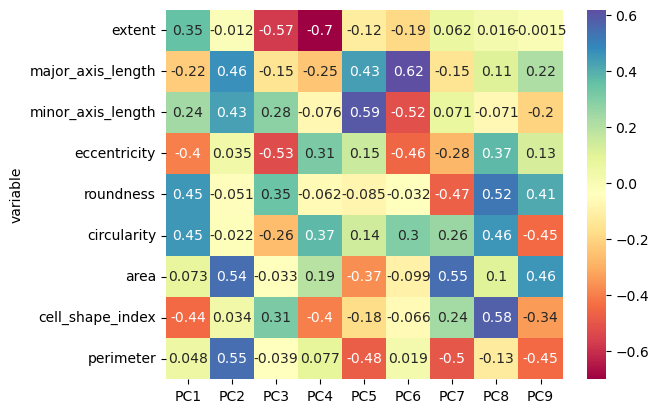

In [13]:

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()


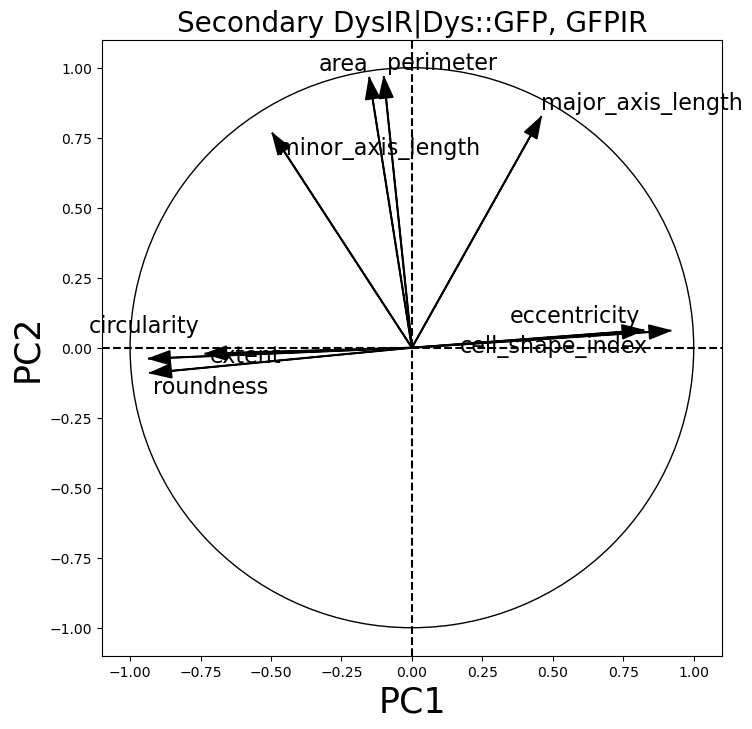

In [14]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Secondary DysIR|Dys::GFP, GFPIR', fontsize=20)

plt.savefig('Correlation_circle_Revision_Secondary_Dys_IR_DysMiMic_comparison_.png', dpi=500)

[0.45760604 0.36861193]


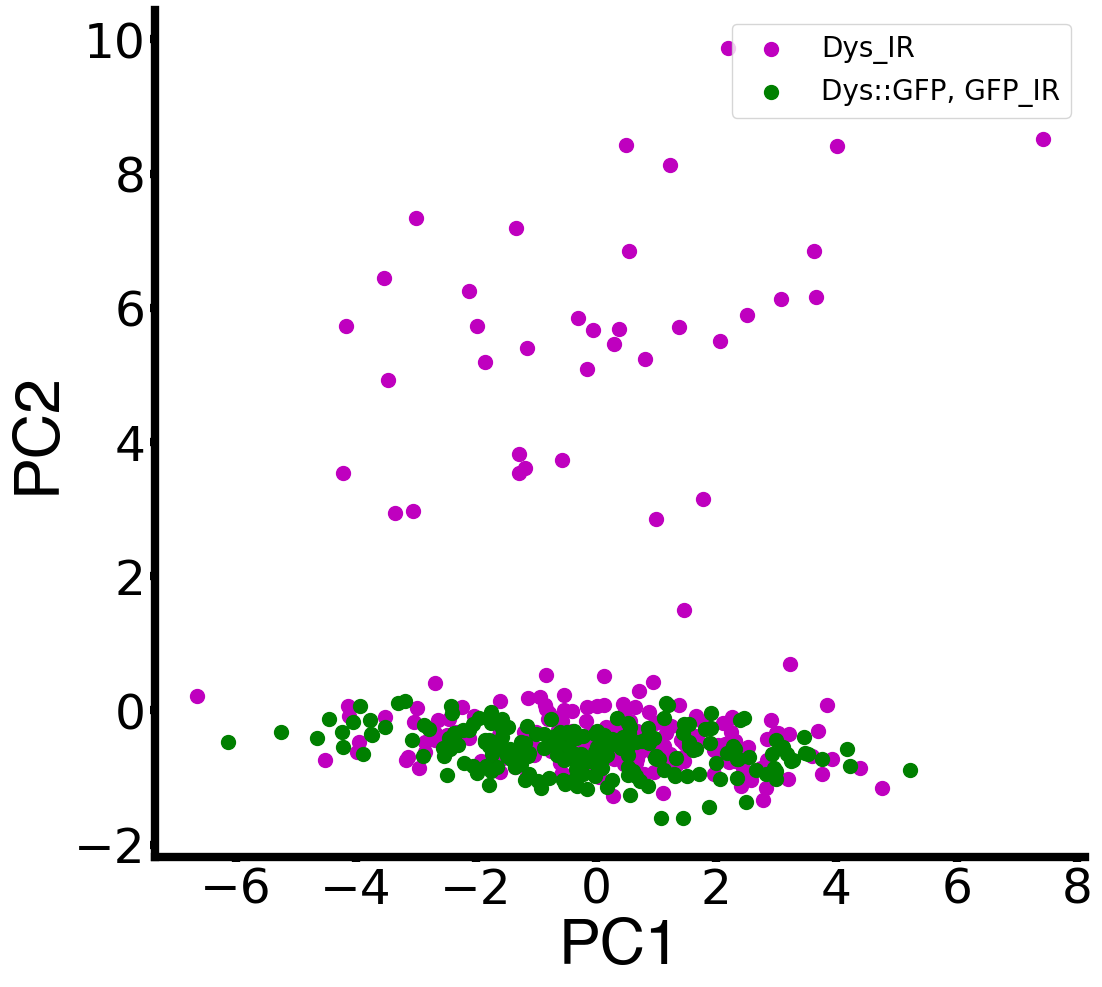

In [15]:
target_select=['Dys_IR','GFP_IR_DysGFP']
labels=['Dys_IR','Dys::GFP, GFP_IR']


PCA_(tertiary_Dys, target_select, labels,0, 'PCA_compare_tertiary_Cells_Dys_IR_DysGFP_GFP_IR')

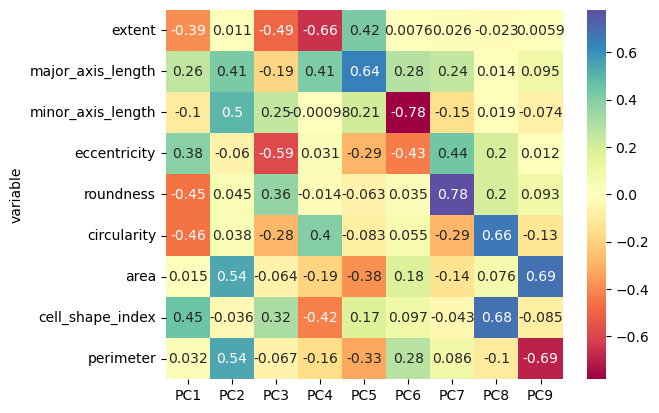

In [16]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

Text(0.5, 1.0, 'Tertiary DysIR|Dys::GFP, GFPIR')

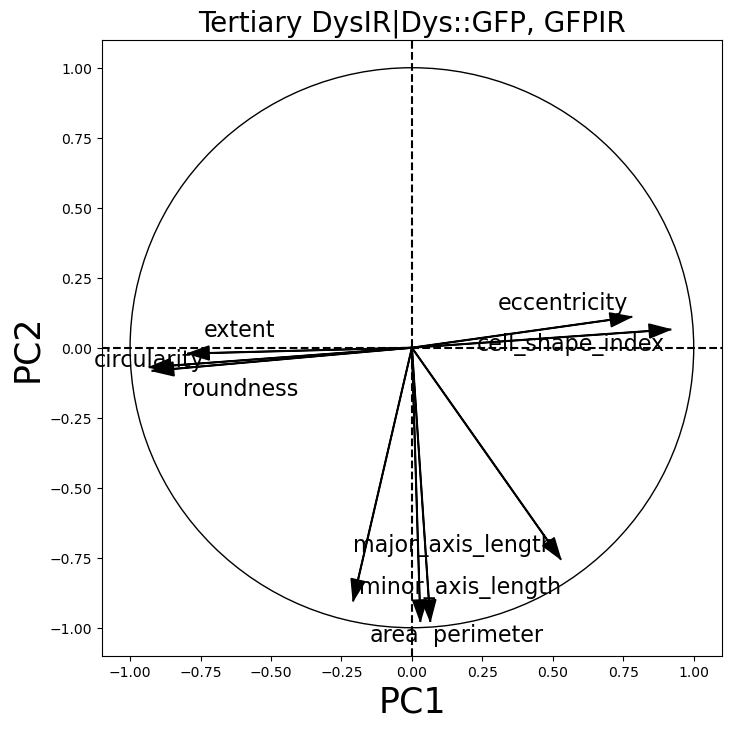

In [17]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Tertiary DysIR|Dys::GFP, GFPIR', fontsize=20)

#plt.savefig('Correlation_circle_Revision_Tertiarys_Dys_IR_DysMiMic_comparison_.png', dpi=500)

[0.49807233 0.34452546]


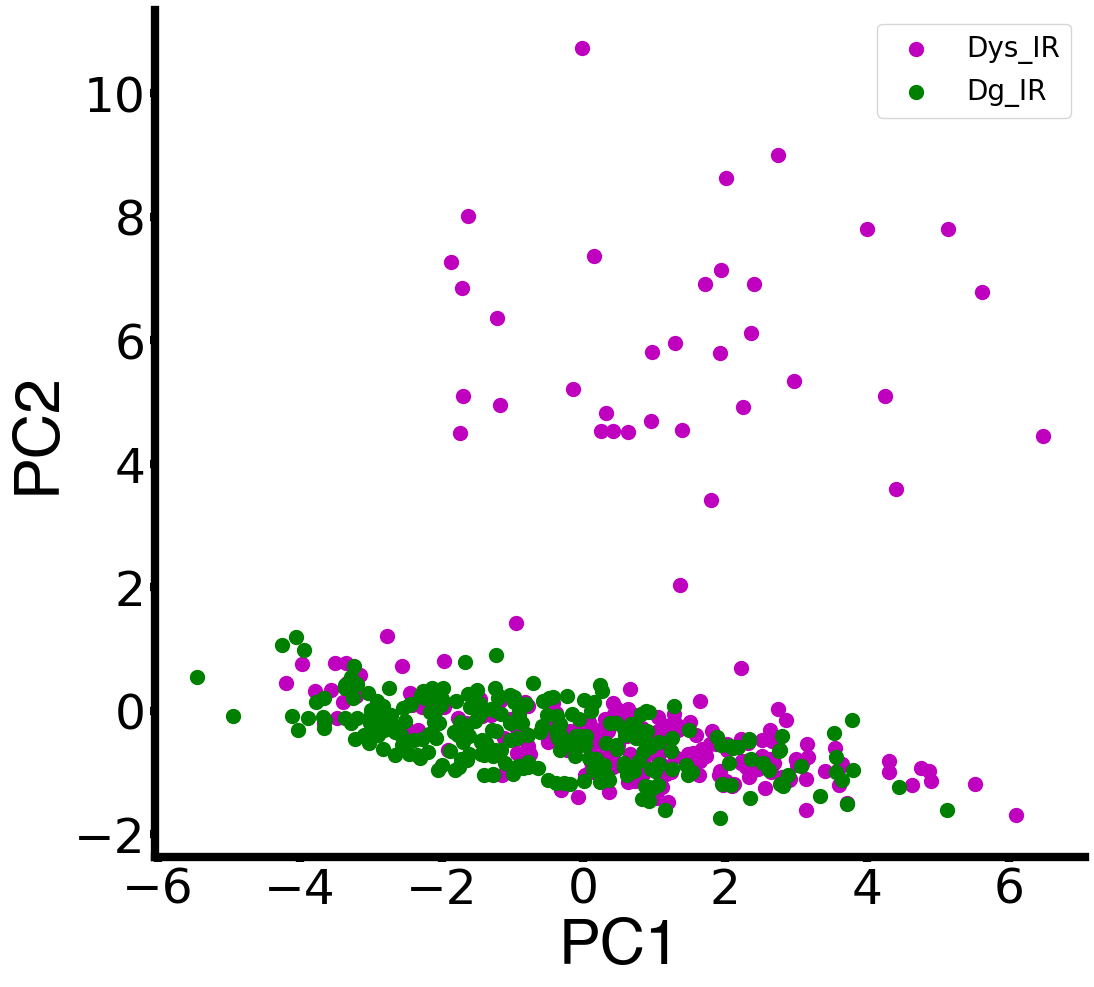

In [94]:
target_select=['Dys_IR','Dg_IR']
labels=['Dys_IR','Dg_IR']


PCA_(secondary_Dg_Dys, target_select, labels,0, 'PCA_compare_secondary_Cells_DysIR_DgIR')

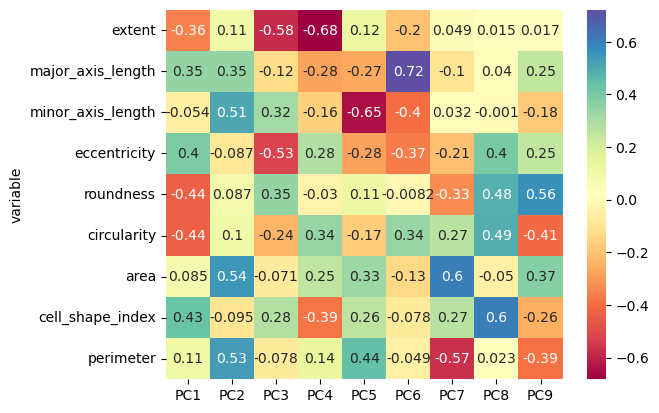

In [92]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

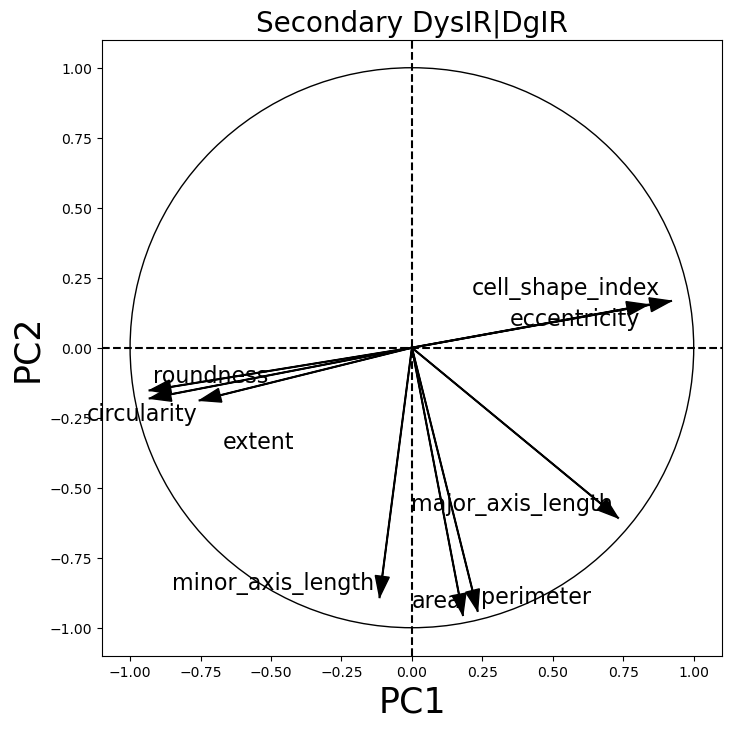

In [95]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Secondary DysIR|DgIR', fontsize=20)

#plt.savefig('Correlation_circle_Revision_Secondary_Dys_IR_DgIR_.png', dpi=500)

[0.47511785 0.35373108]


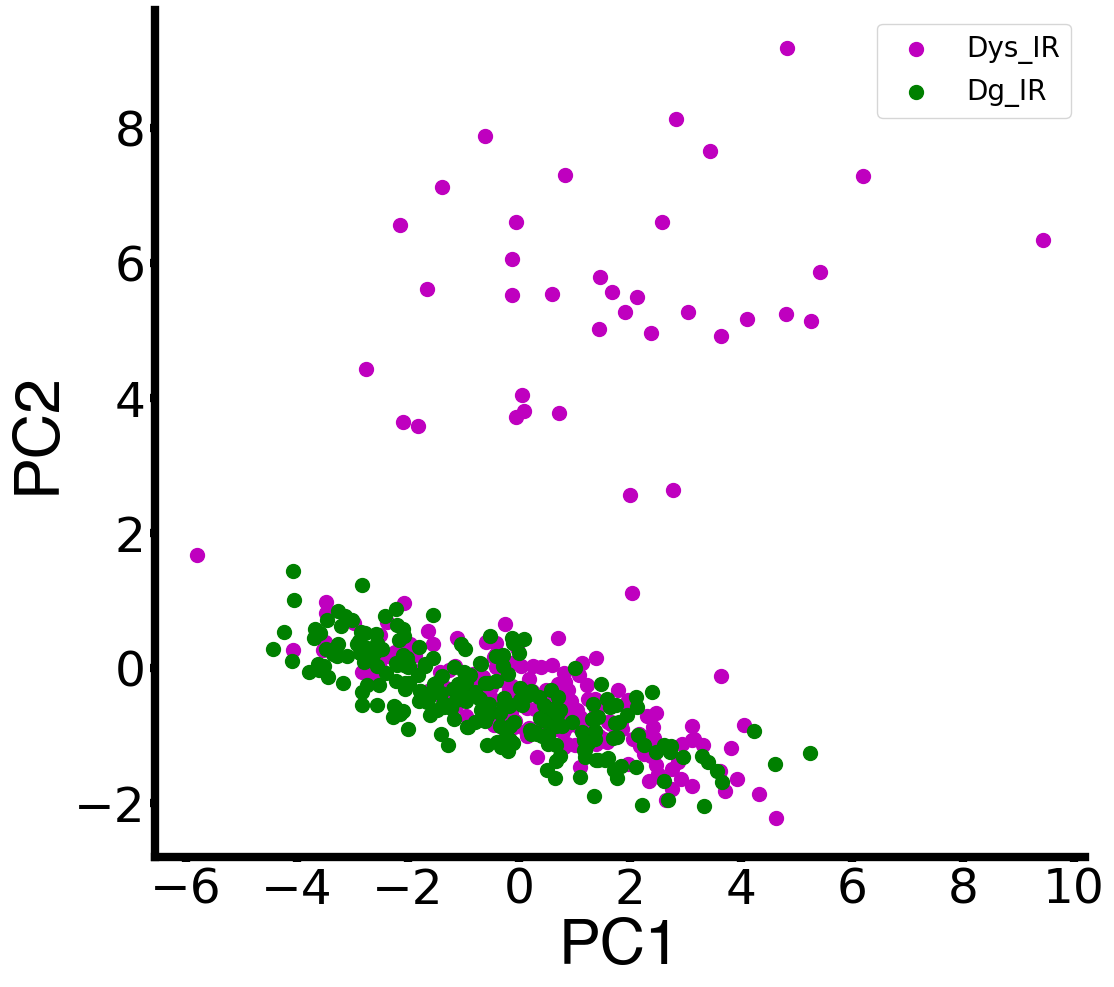

In [97]:
target_select=['Dys_IR','Dg_IR']
labels=['Dys_IR','Dg_IR']


PCA_(tertiary_Dg_Dys, target_select, labels,0, 'PCA_compare_tertiay_Cells_DysIR_DgIR')

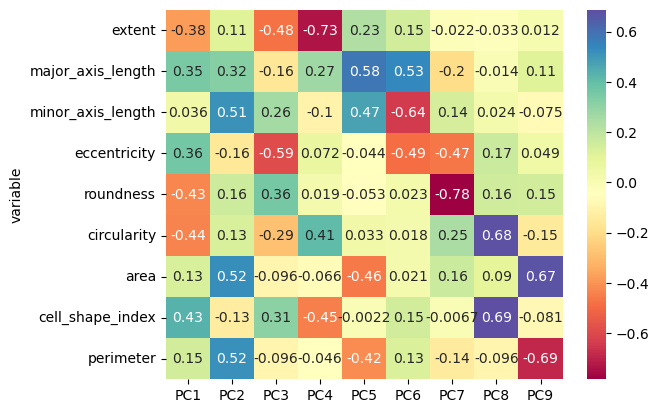

In [98]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

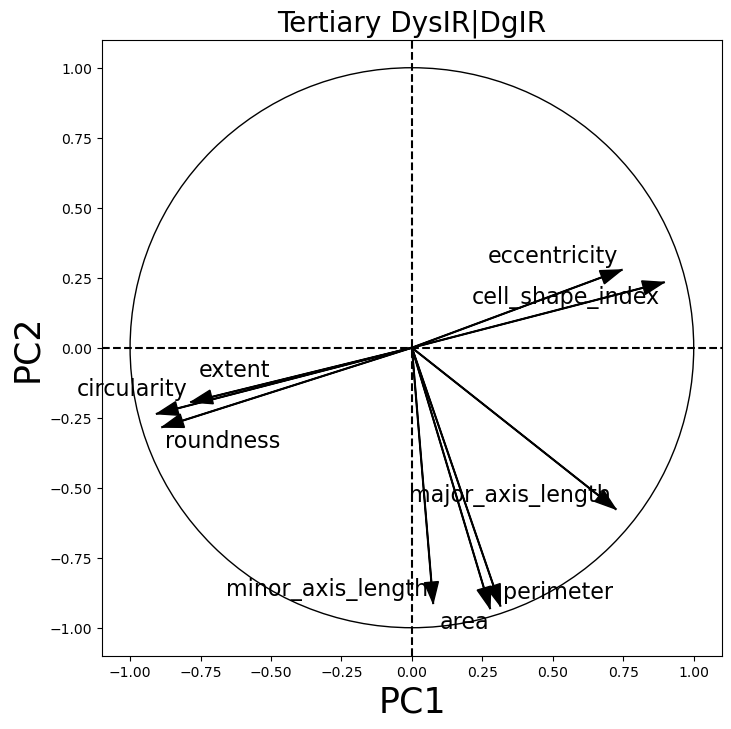

In [99]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Tertiary DysIR|DgIR', fontsize=20)

#plt.savefig('Correlation_circle_Revision_Tertiary_Dys_IR_DgIR_.png', dpi=500)

[0.59811414 0.26946963]


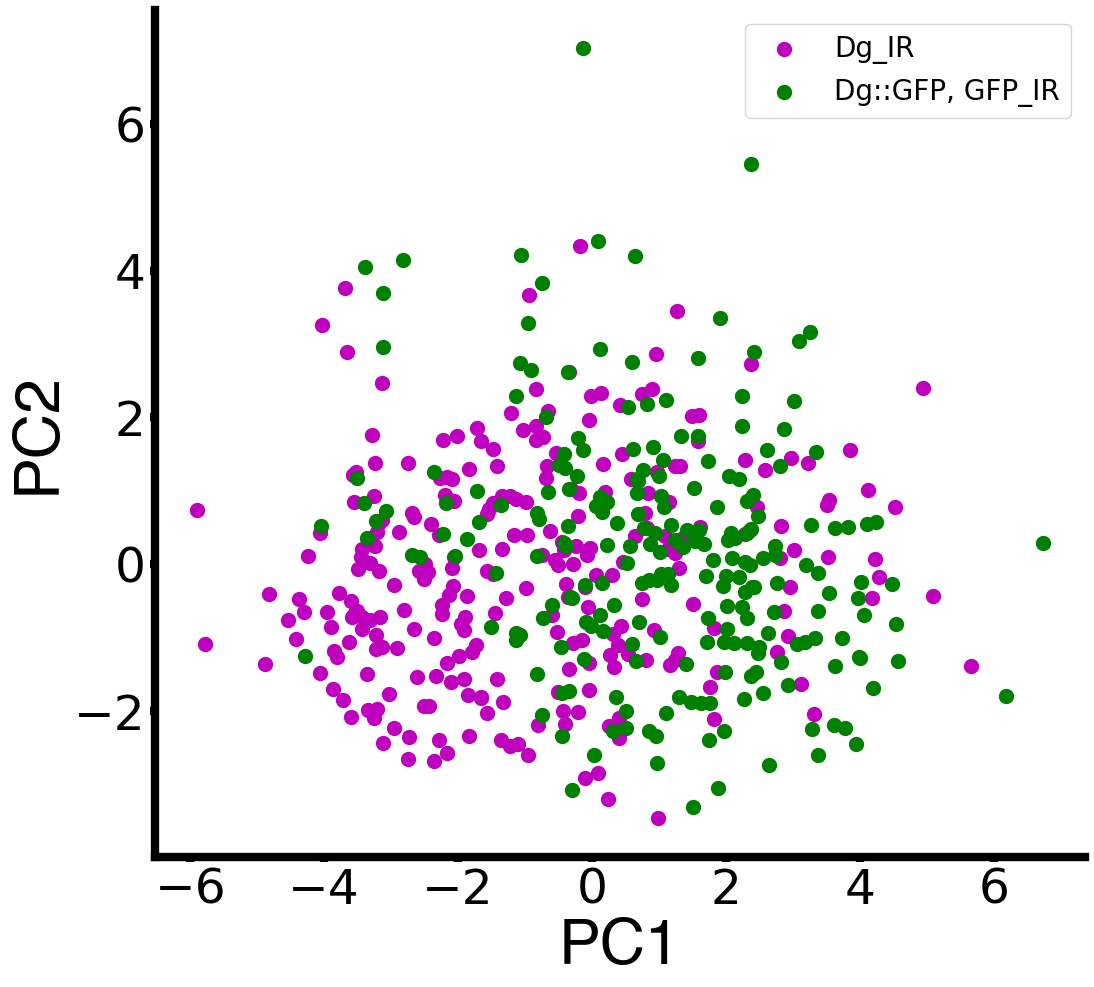

In [43]:
target_select=['Dg_IR','GFP_IR_DgGFP']
labels=['Dg_IR','Dg::GFP, GFP_IR']


PCA_(secondary_Dg_dgGFP, target_select, labels,1, 'PCA_compare_secondary_Cells_DgIR_DgGFP_GFP_IR')

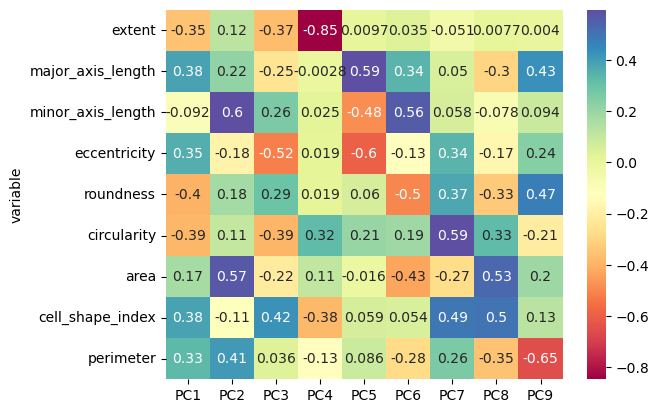

In [44]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

Text(0.5, 1.0, 'Secondary DgIR|DgGFP, GFPIR')

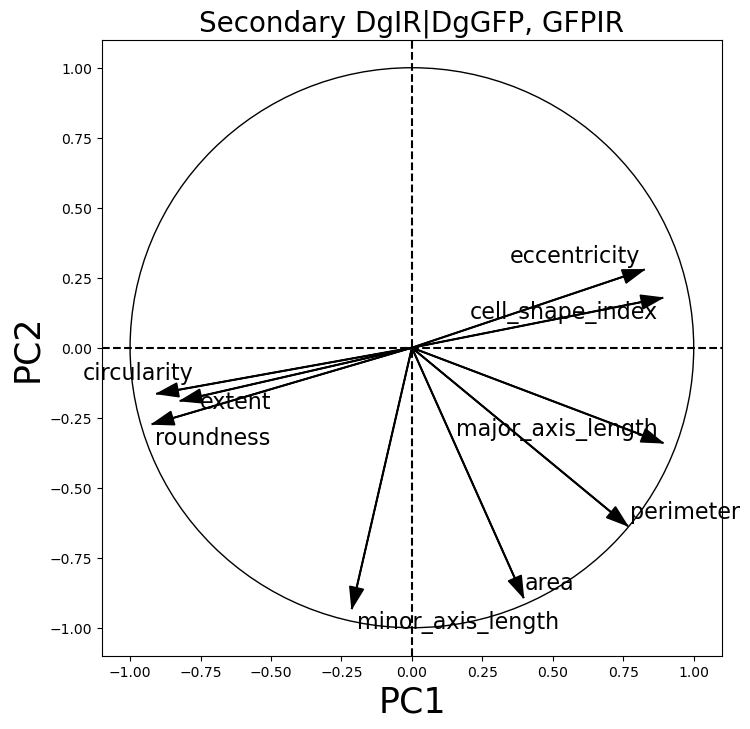

In [45]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Secondary DgIR|DgGFP, GFPIR', fontsize=20)

#plt.savefig('Correlation_circle_Revision_Secondary_Dg_GFP_GFPIR_.png', dpi=500)

[0.58551869 0.26867839]


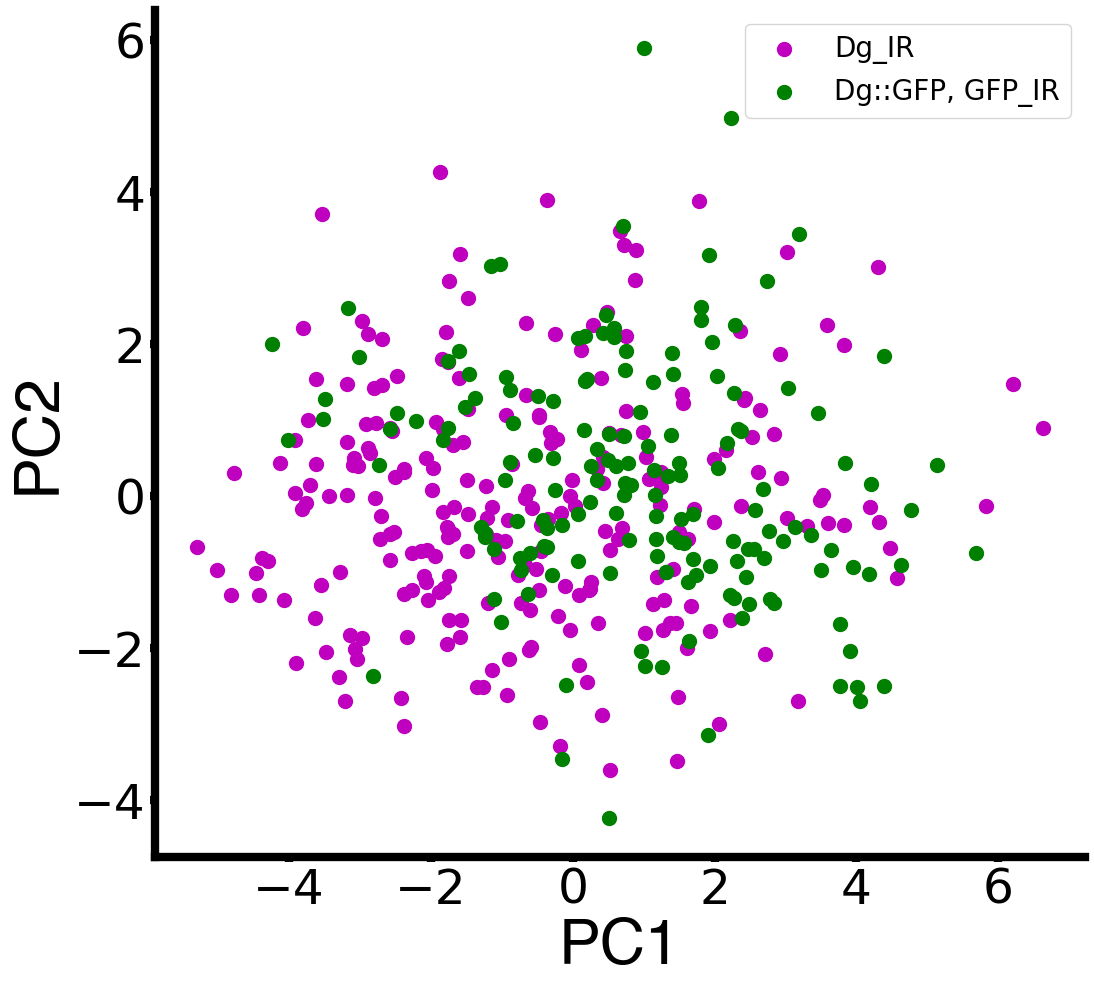

In [42]:
target_select=['Dg_IR','GFP_IR_DgGFP']
labels=['Dg_IR','Dg::GFP, GFP_IR']


PCA_(tertiary_Dg_dgGFP, target_select, labels,0, 'PCA_compare_tertiary_Cells_DgIR_DgGFP_GFP_IR')

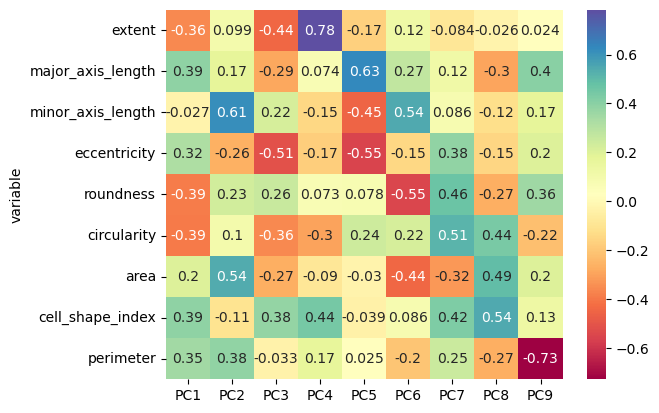

In [39]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

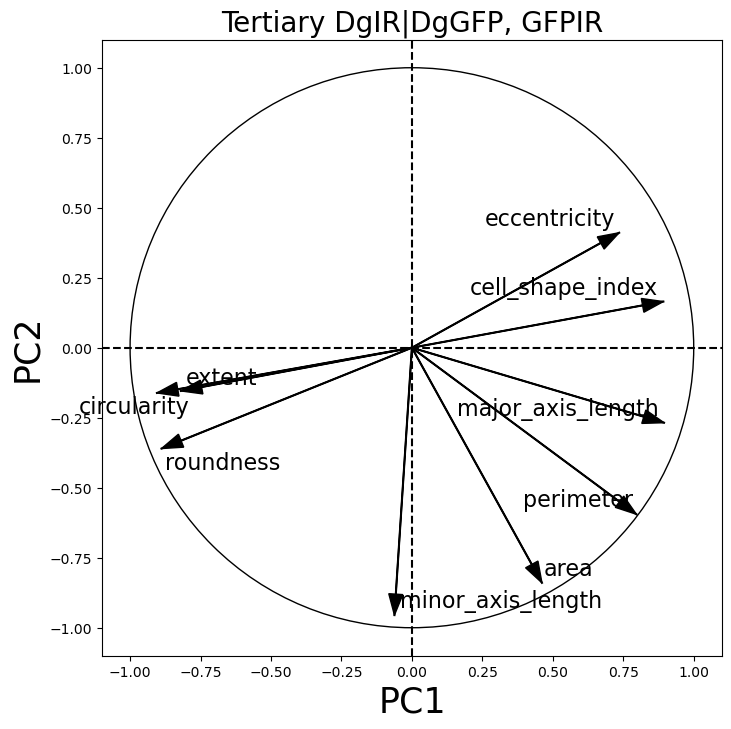

In [40]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Tertiary DgIR|DgGFP, GFPIR', fontsize=20)

plt.savefig('Correlation_circle_Revision_Tertiary_Dg_GFP_GFPIR_.png', dpi=500)

[0.54399544 0.28615699]


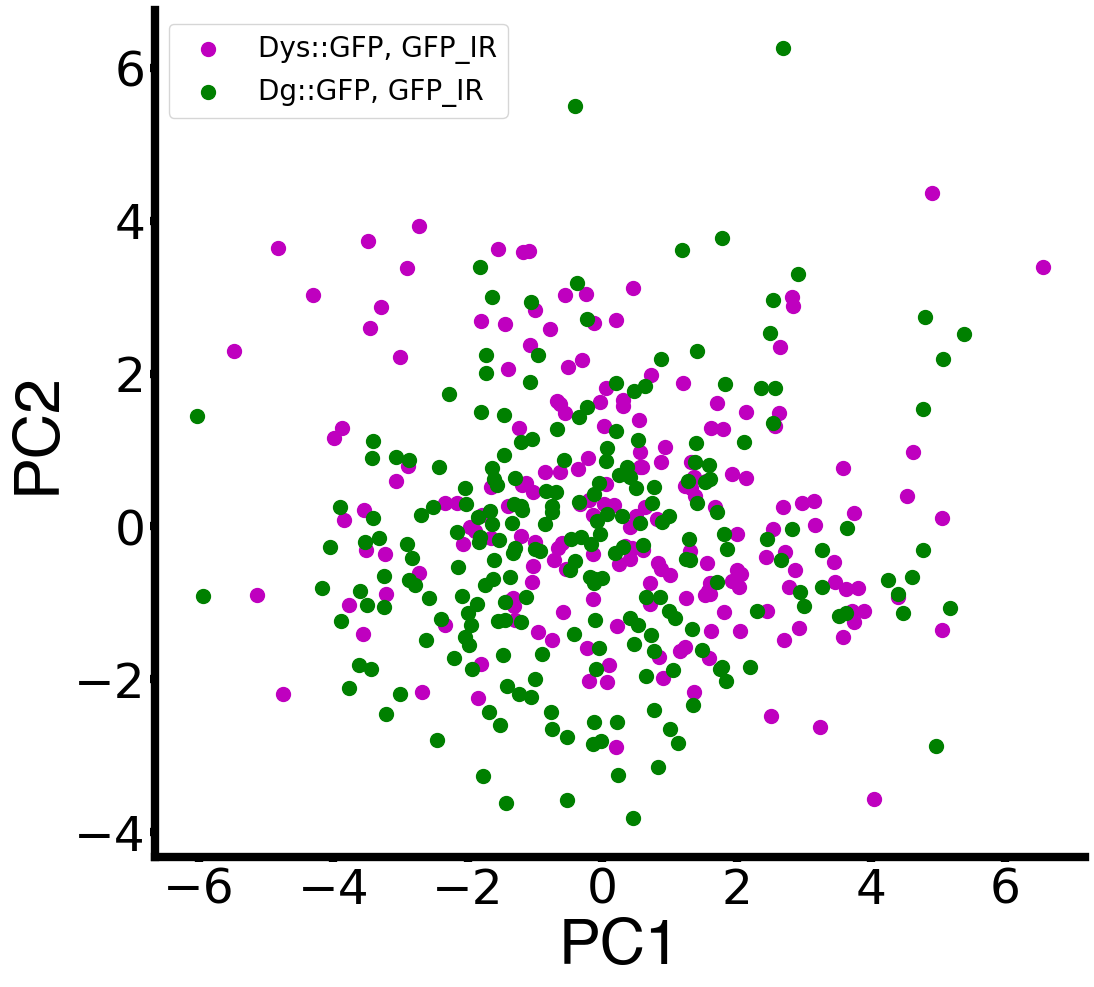

In [62]:
target_select=['GFP_IR_DysGFP','GFP_IR_DgGFP']
labels=['Dys::GFP, GFP_IR','Dg::GFP, GFP_IR']


PCA_(secondary_GFPs, target_select, labels,0, 'PCA_compare_secondary_Cells_DysGFP_DgGFP')

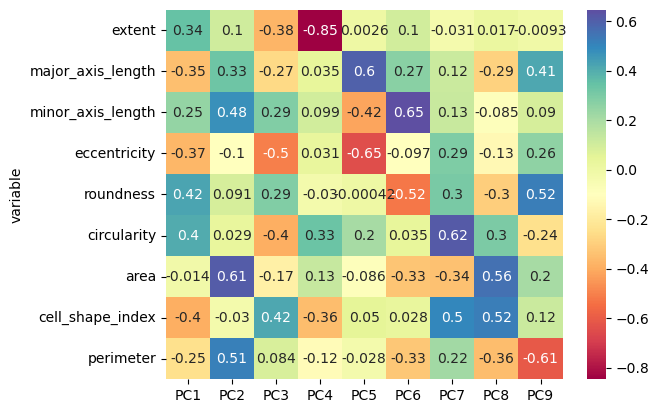

In [63]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

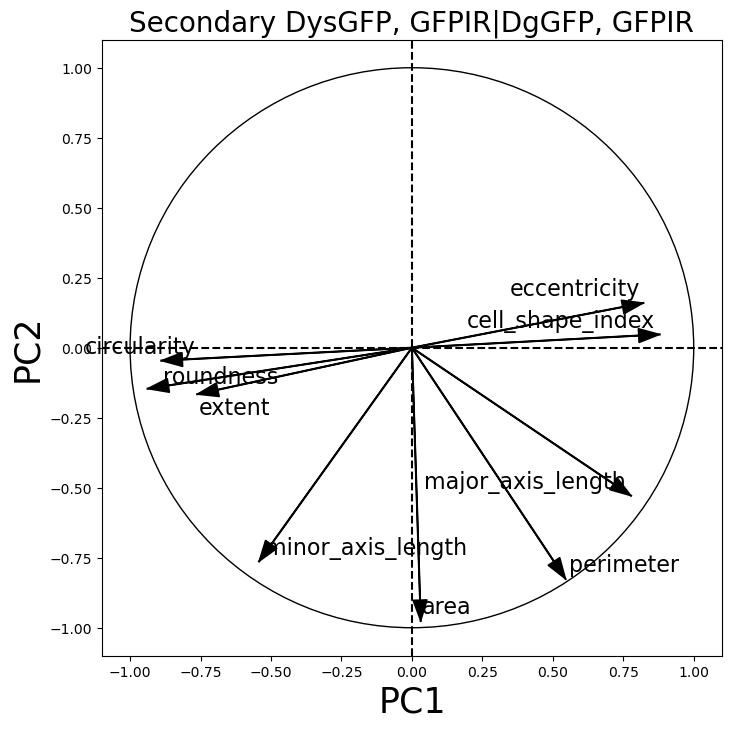

In [65]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Secondary DysGFP, GFPIR|DgGFP, GFPIR', fontsize=20)

#plt.savefig('Correlation_circle_Revision_Secondary_Dg_Dys_GFP_GFPIR_.png', dpi=500)

[0.56889163 0.26299931]


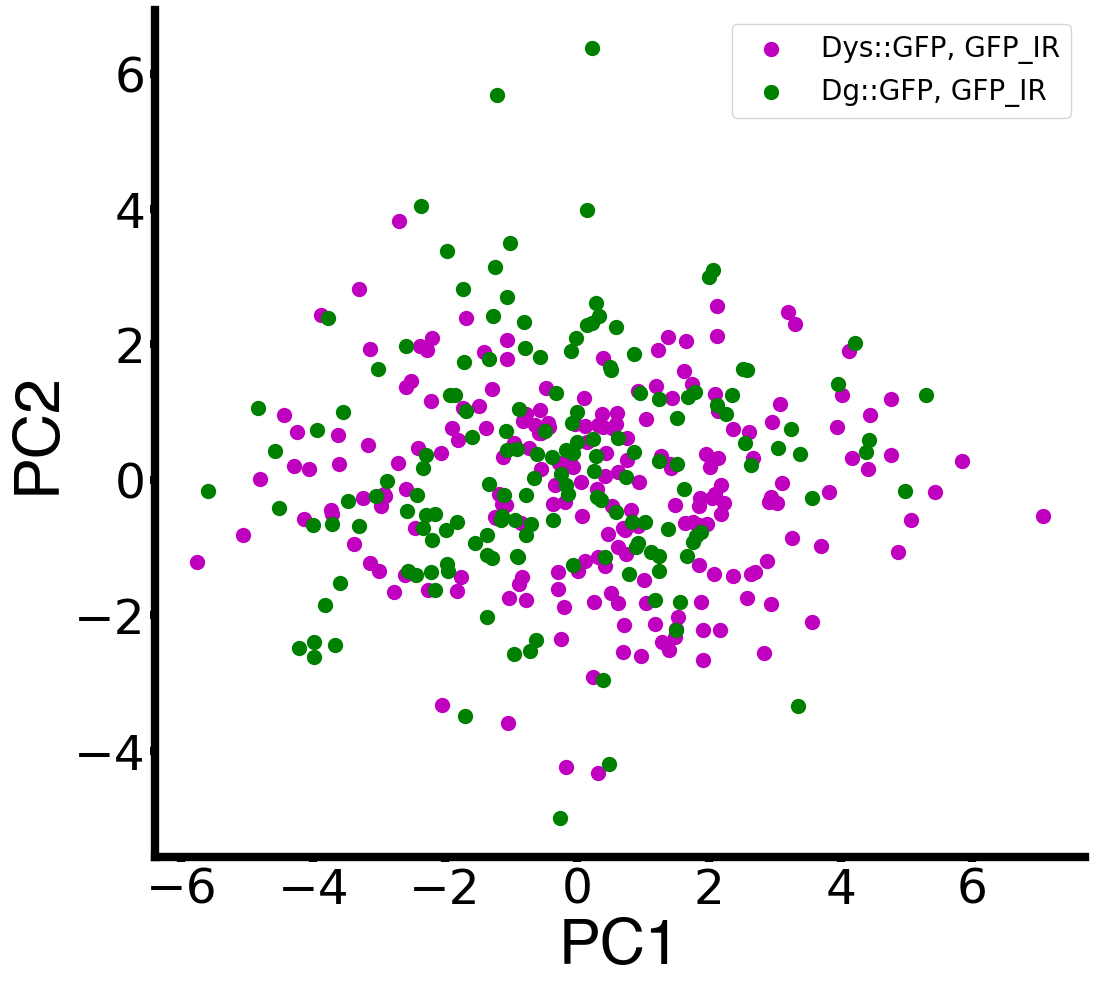

In [66]:
target_select=['GFP_IR_DysGFP','GFP_IR_DgGFP']
labels=['Dys::GFP, GFP_IR','Dg::GFP, GFP_IR']


PCA_(tertiary_GFPs, target_select, labels,0, 'PCA_compare_tertiary_Cells_DysGFP_DgGFP')

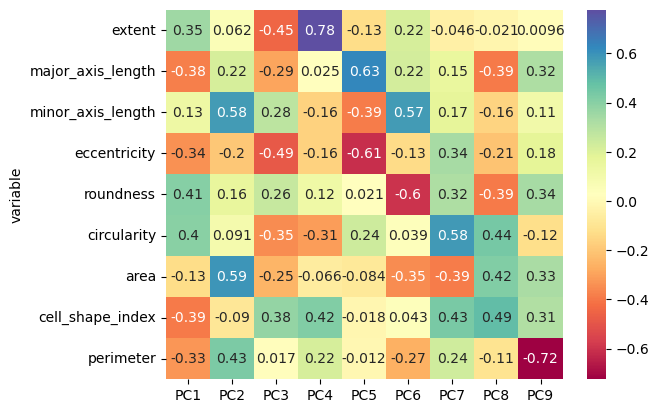

In [67]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = features
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

Text(0.5, 1.0, 'Tertiary DysGFP, GFPIR|DgGFP, GFPIR')

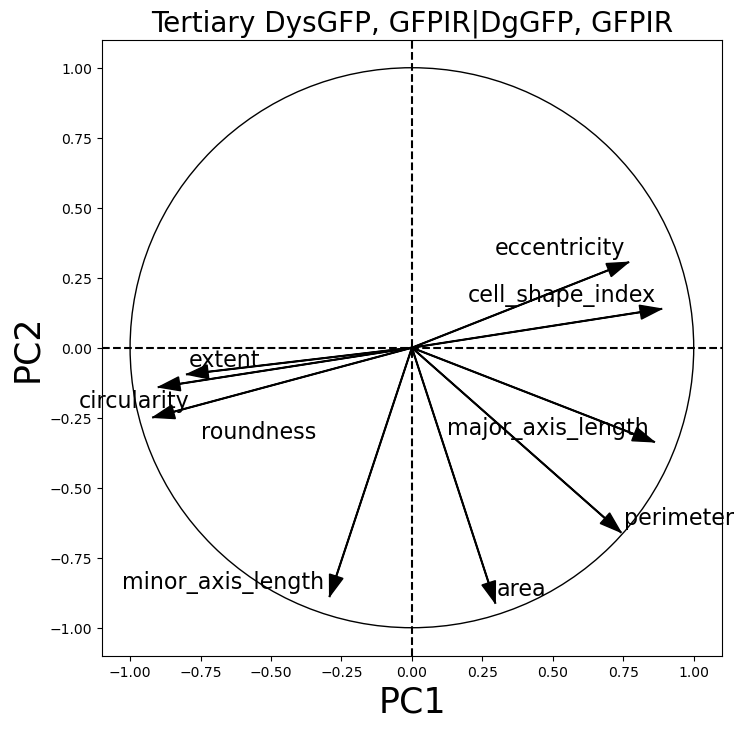

In [68]:
from mlxtend.plotting import plot_pca_correlation_graph

feature, correlatoin_matrix = plot_pca_correlation_graph(x,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.xlabel('PC1',fontsize=25)
plt.ylabel('PC2',fontsize=25)
plt.title('Tertiary DysGFP, GFPIR|DgGFP, GFPIR', fontsize=20)

#plt.savefig('Correlation_circle_Revision_Tertiary_Dg_Dys_GFP_GFPIR_.png', dpi=500)